# Visual Benchmarking of Car Manufacturers

## Import Modules:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Import Predictions from the Best Model and Ground Truth:

In [6]:
df_test = pd.read_csv("Dataset1_test.csv")

df = pd.DataFrame()
df["Ground Truth"] = df_test["CO2 Emissions(g/km)"]
df["Make"] = df_test["Make"]

In [7]:
df_pred =  pd.read_csv("Workstream_1_ML_models/nn_test_pred.csv")
df["Predictions"] = df_pred["y"]
df.head(3)

,Ground Truth,Make,Predictions
0,368,CHEVROLET,363.71918
1,290,GMC,294.20322
2,382,AUDI,382.78836


## Calculate Mean Error for Each Manufacturers:

In [8]:
df["Error"] = df["Ground Truth"] - df["Predictions"]

In [9]:
manufact = []
means = []
totals = []

for i in df["Make"].unique():
    manufact.append(i)
    means.append(df[df["Make"] == i]["Error"].mean())
    totals.append(df[df["Make"] == i]["Error"].sum())

d = {"Manufactureres": manufact,
    "Mean Difference": means,
    "Total Difference": totals}
df_results = pd.DataFrame(data=d)
df_results.sort_values("Mean Difference", ascending=False,inplace=True)
df_results

,Manufactureres,Mean Difference,Total Difference
28,GENESIS,2.532704,12.663520
30,ALFA ROMEO,2.449850,7.349550
13,RAM,0.252085,3.781270
22,SUBARU,0.097818,2.249820
16,MAZDA,0.041624,1.540070
20,NISSAN,0.036771,2.095930
19,PORSCHE,0.031617,1.991870
31,BUICK,0.023844,0.238440
14,KIA,-0.156593,-7.829660
29,FIAT,-0.313135,-4.697030


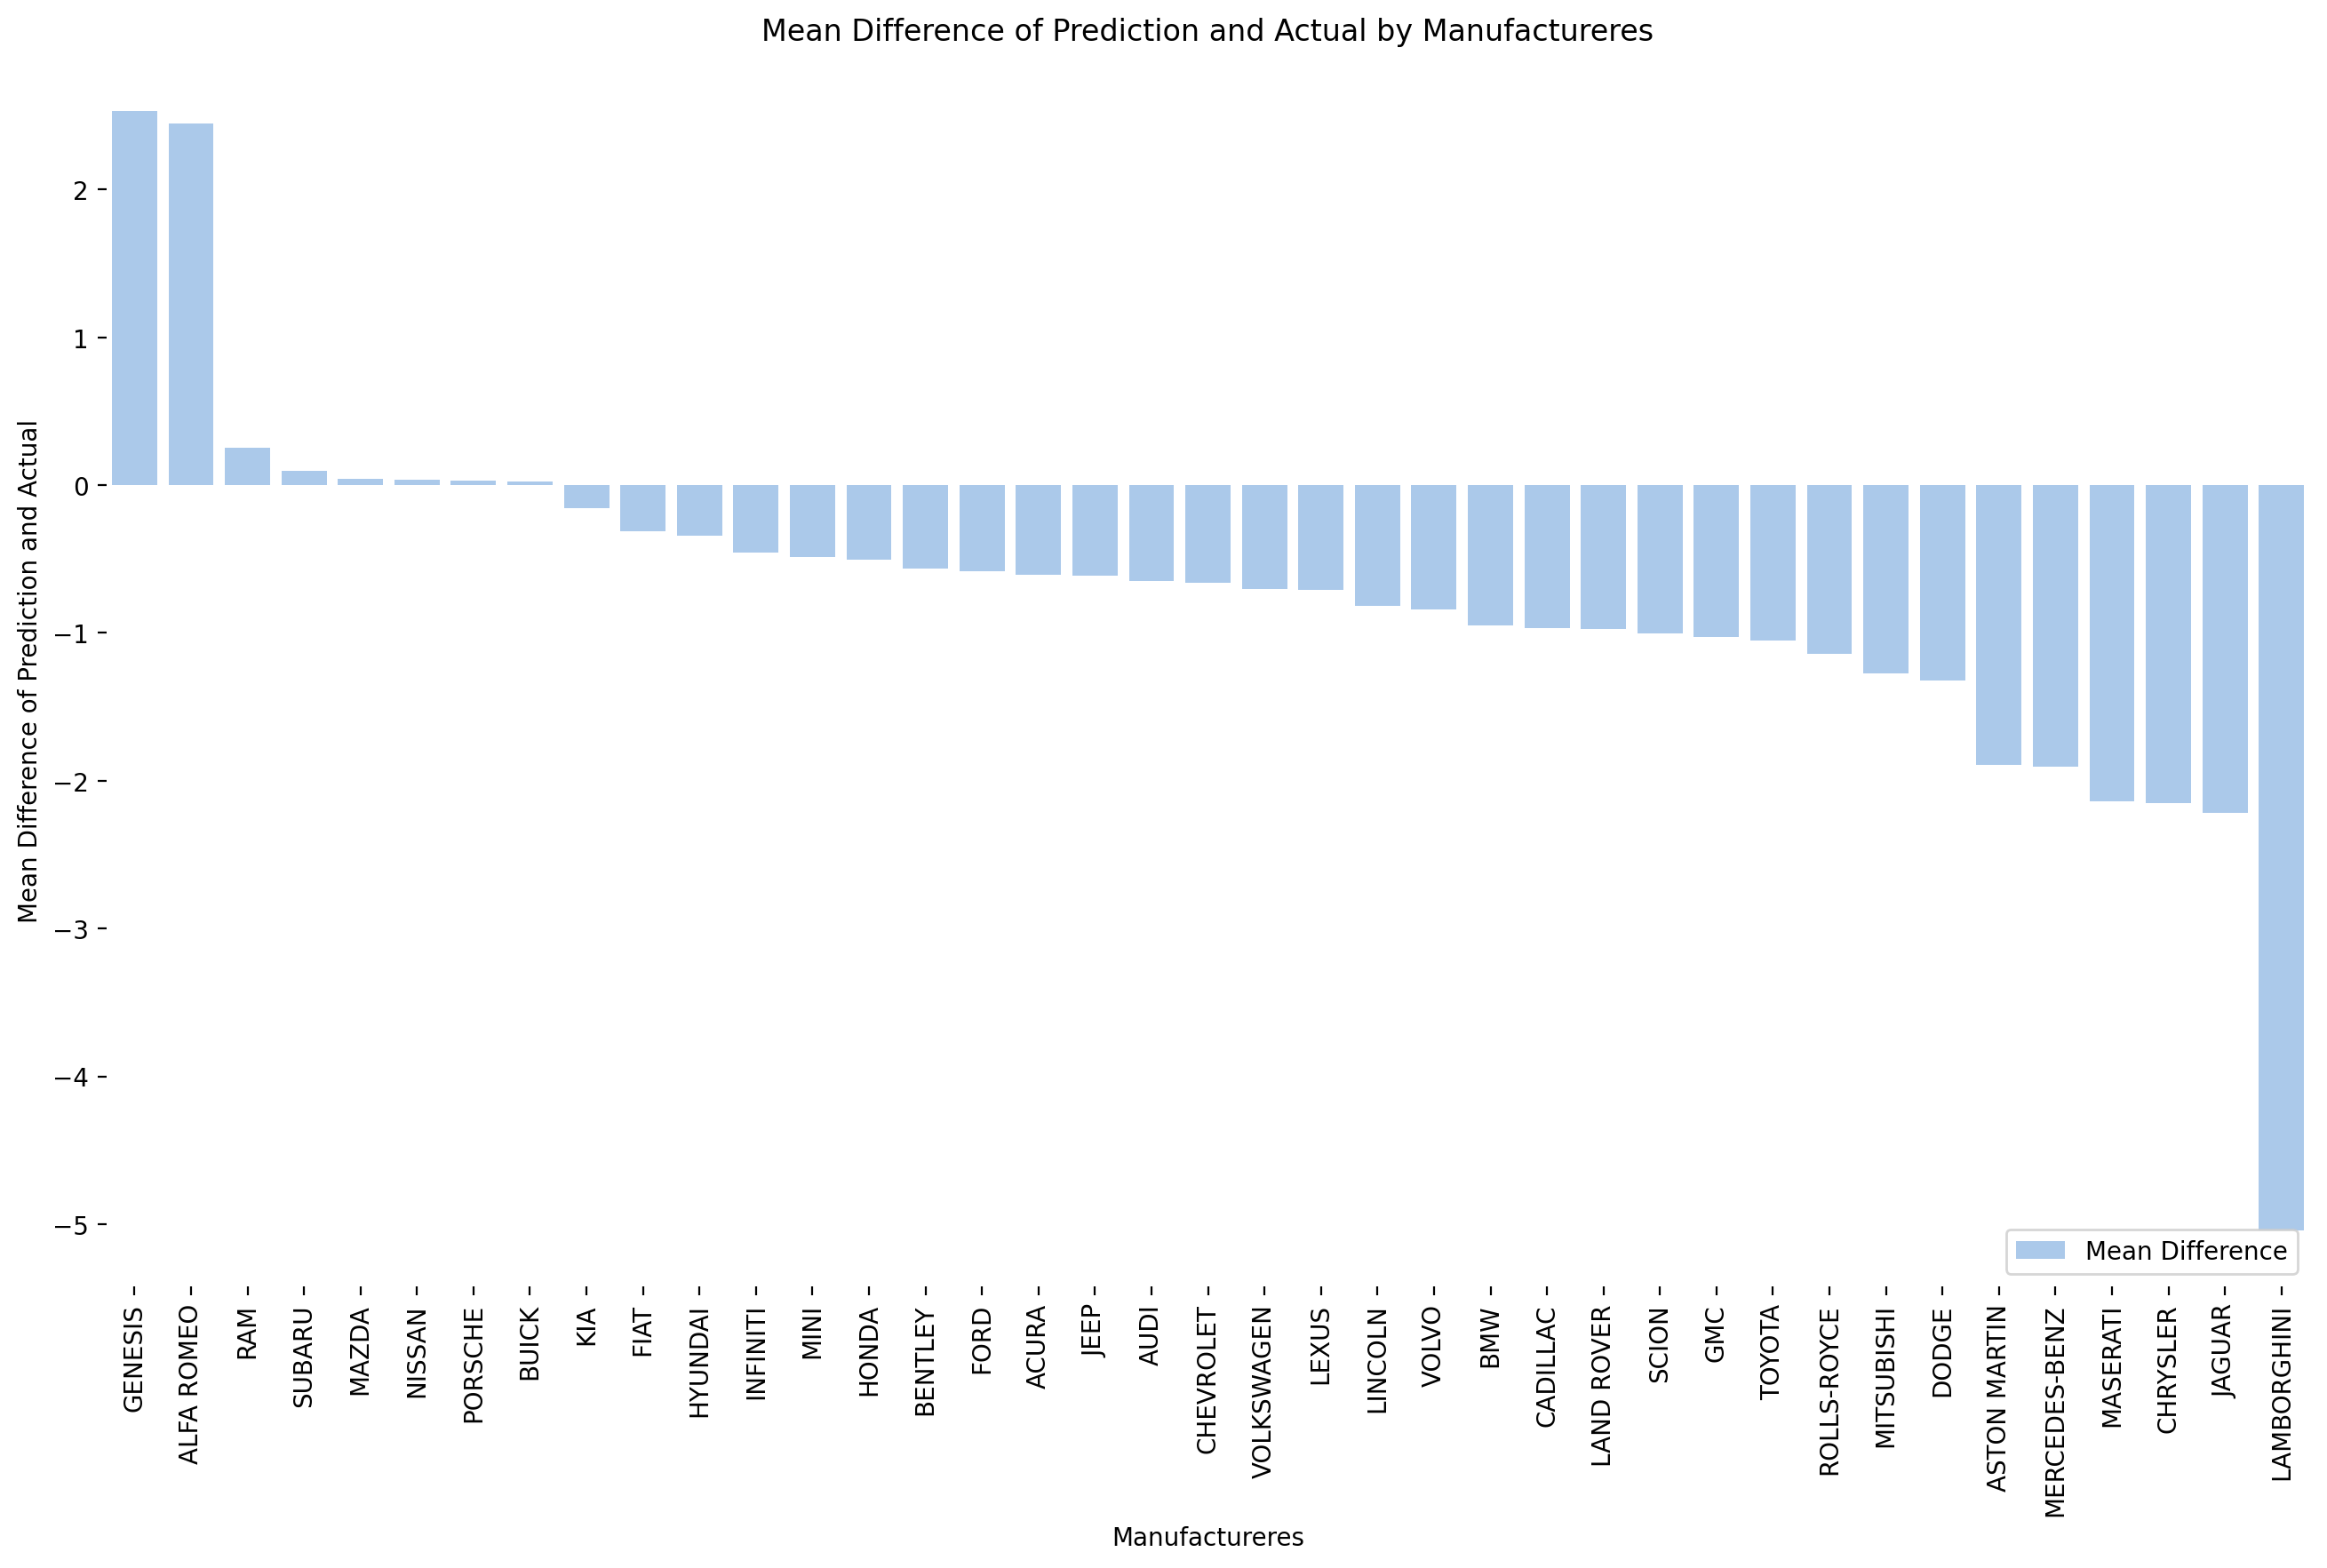

In [10]:
f, ax = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")
sns.barplot(x="Manufactureres", y="Mean Difference", data=df_results,
            label="Mean Difference", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Mean Difference of Prediction and Actual",
       xlabel="Manufactureres", title="Mean Difference of Prediction and Actual by Manufactureres")
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)

plt.savefig("Mean_Pred_vs_True_Manufacturers.svg")
plt.savefig("Mean_Pred_vs_True_Manufacturers.png")
plt.show()

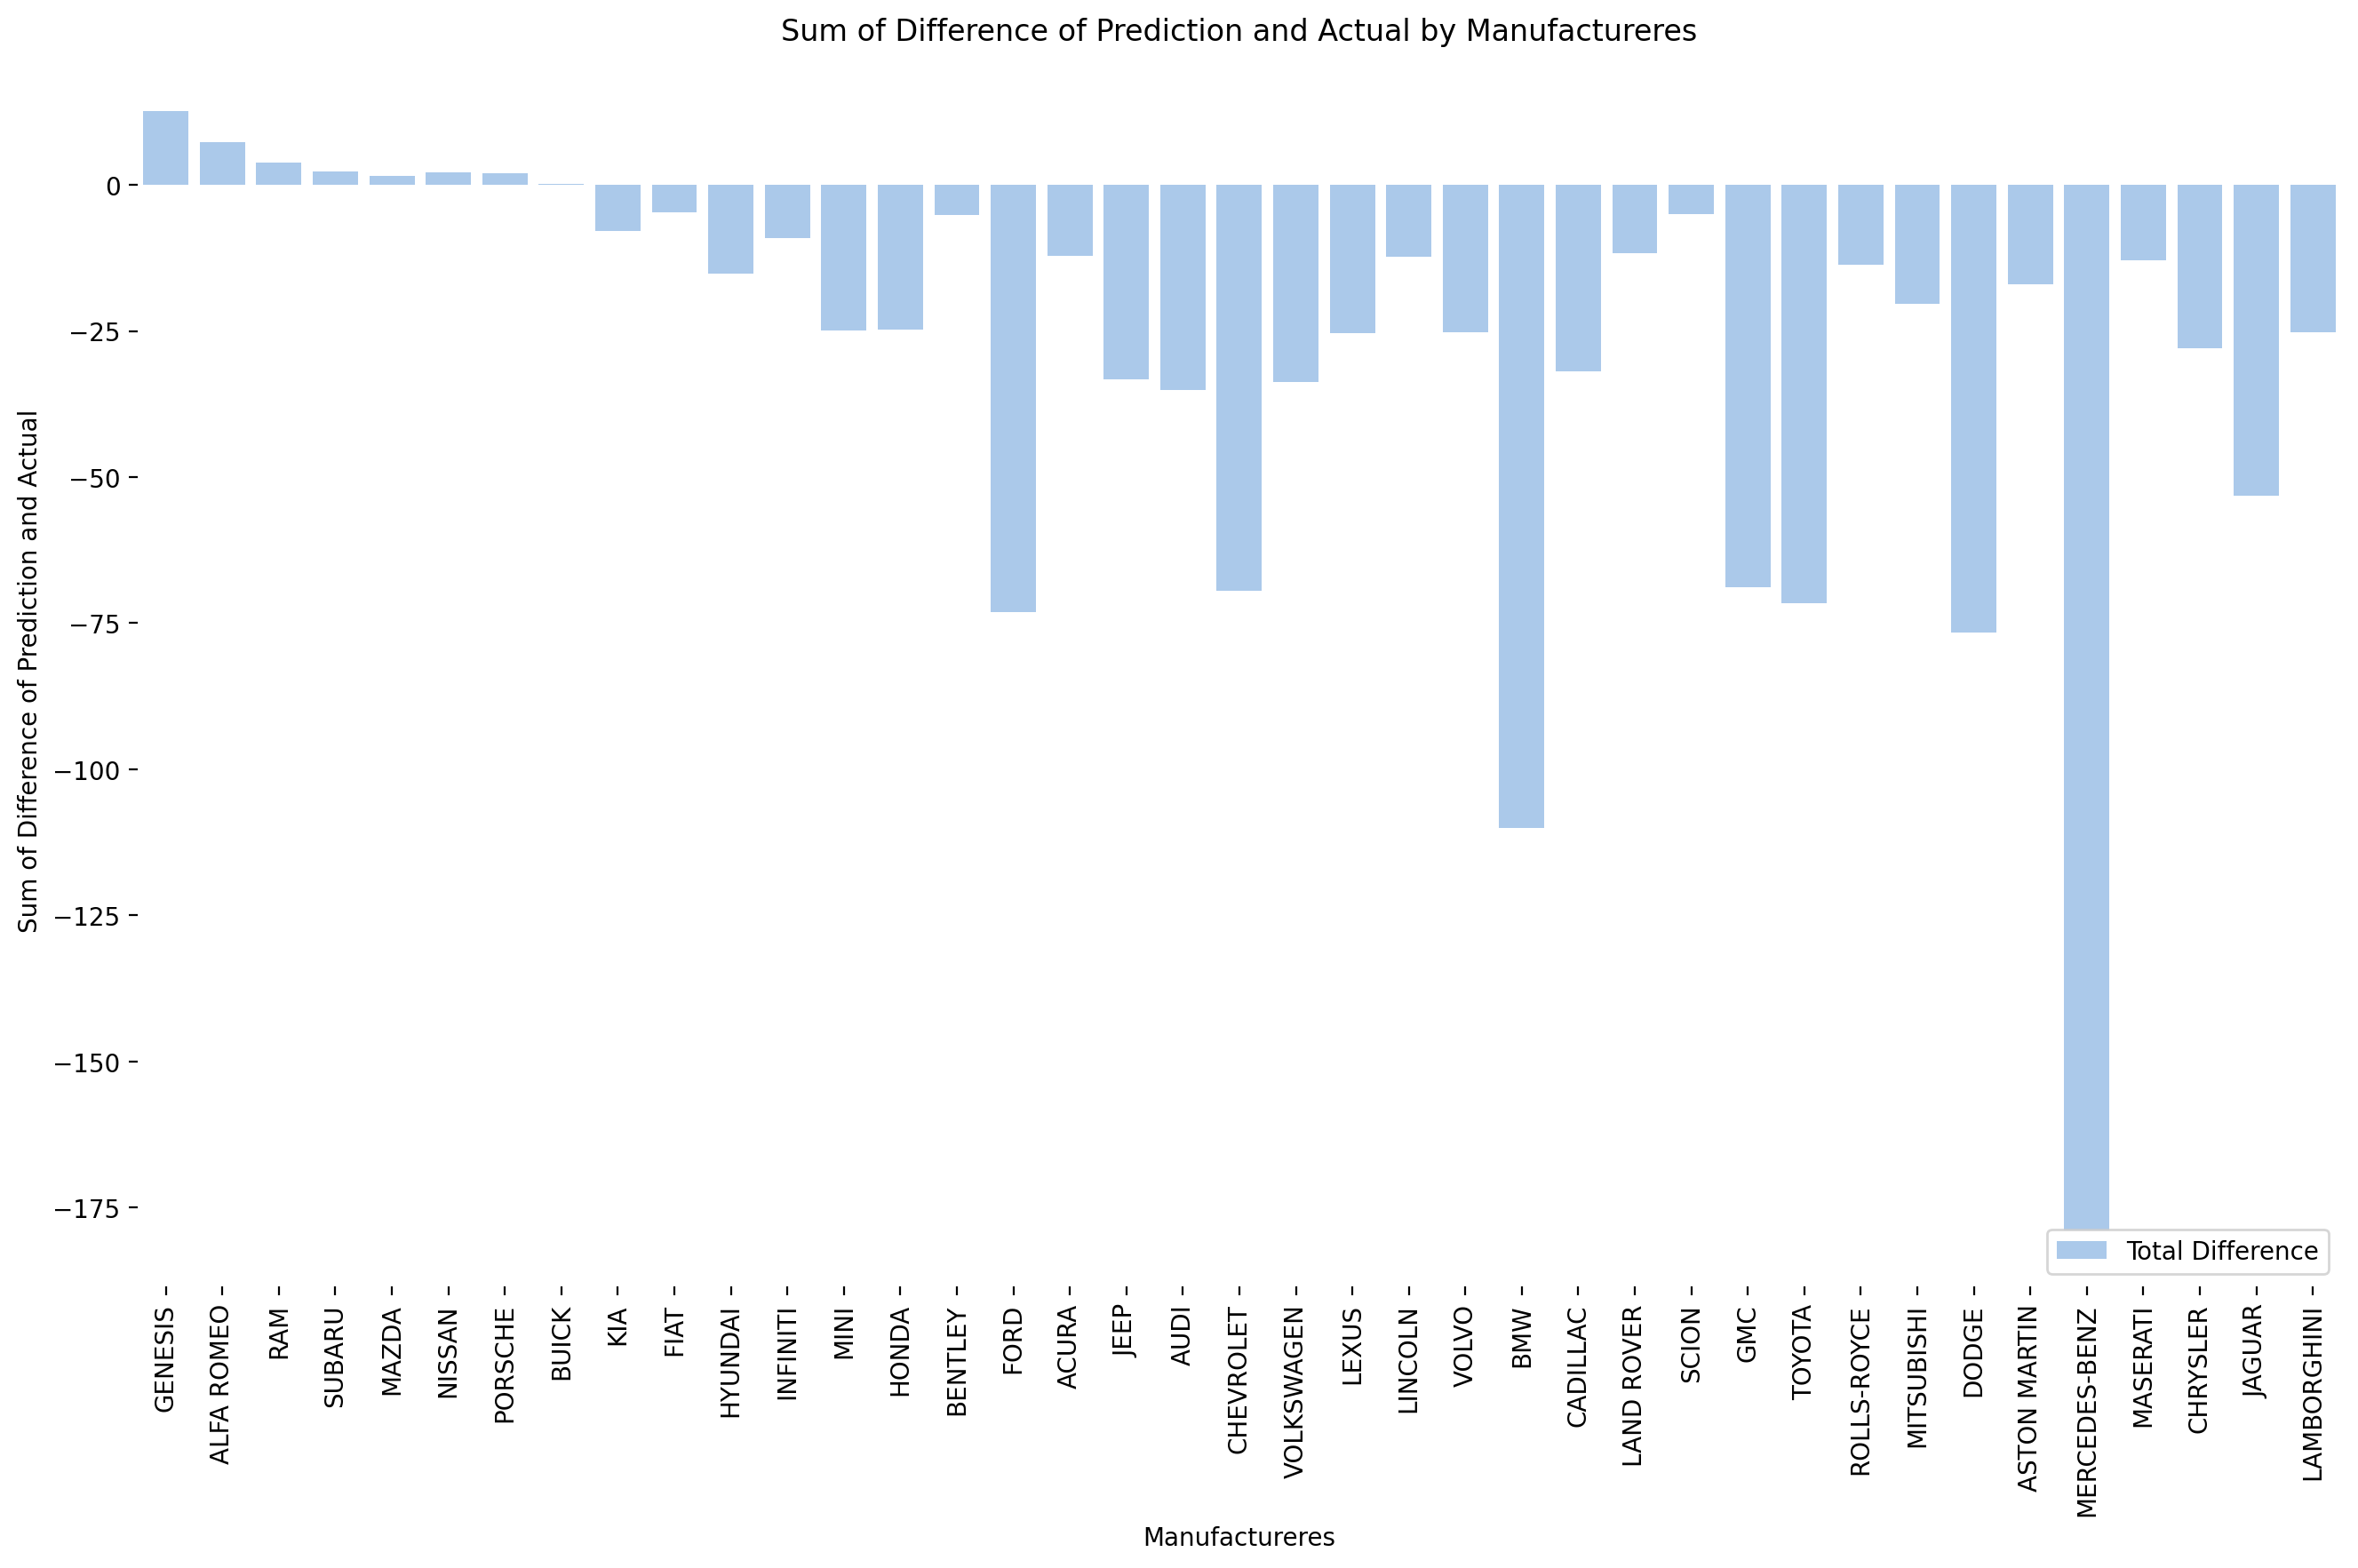

In [11]:
f, ax = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")
sns.barplot(x="Manufactureres", y="Total Difference", data=df_results,
            label="Total Difference", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Sum of Difference of Prediction and Actual",
       xlabel="Manufactureres",title="Sum of Difference of Prediction and Actual by Manufactureres")
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)

plt.savefig("Sum_Pred_vs_True_Manufacturers.svg")
plt.savefig("Sum_Pred_vs_True_Manufacturers.png")
plt.show()

## Plot Predicitons Vs Ground Truth By Manufacturers:

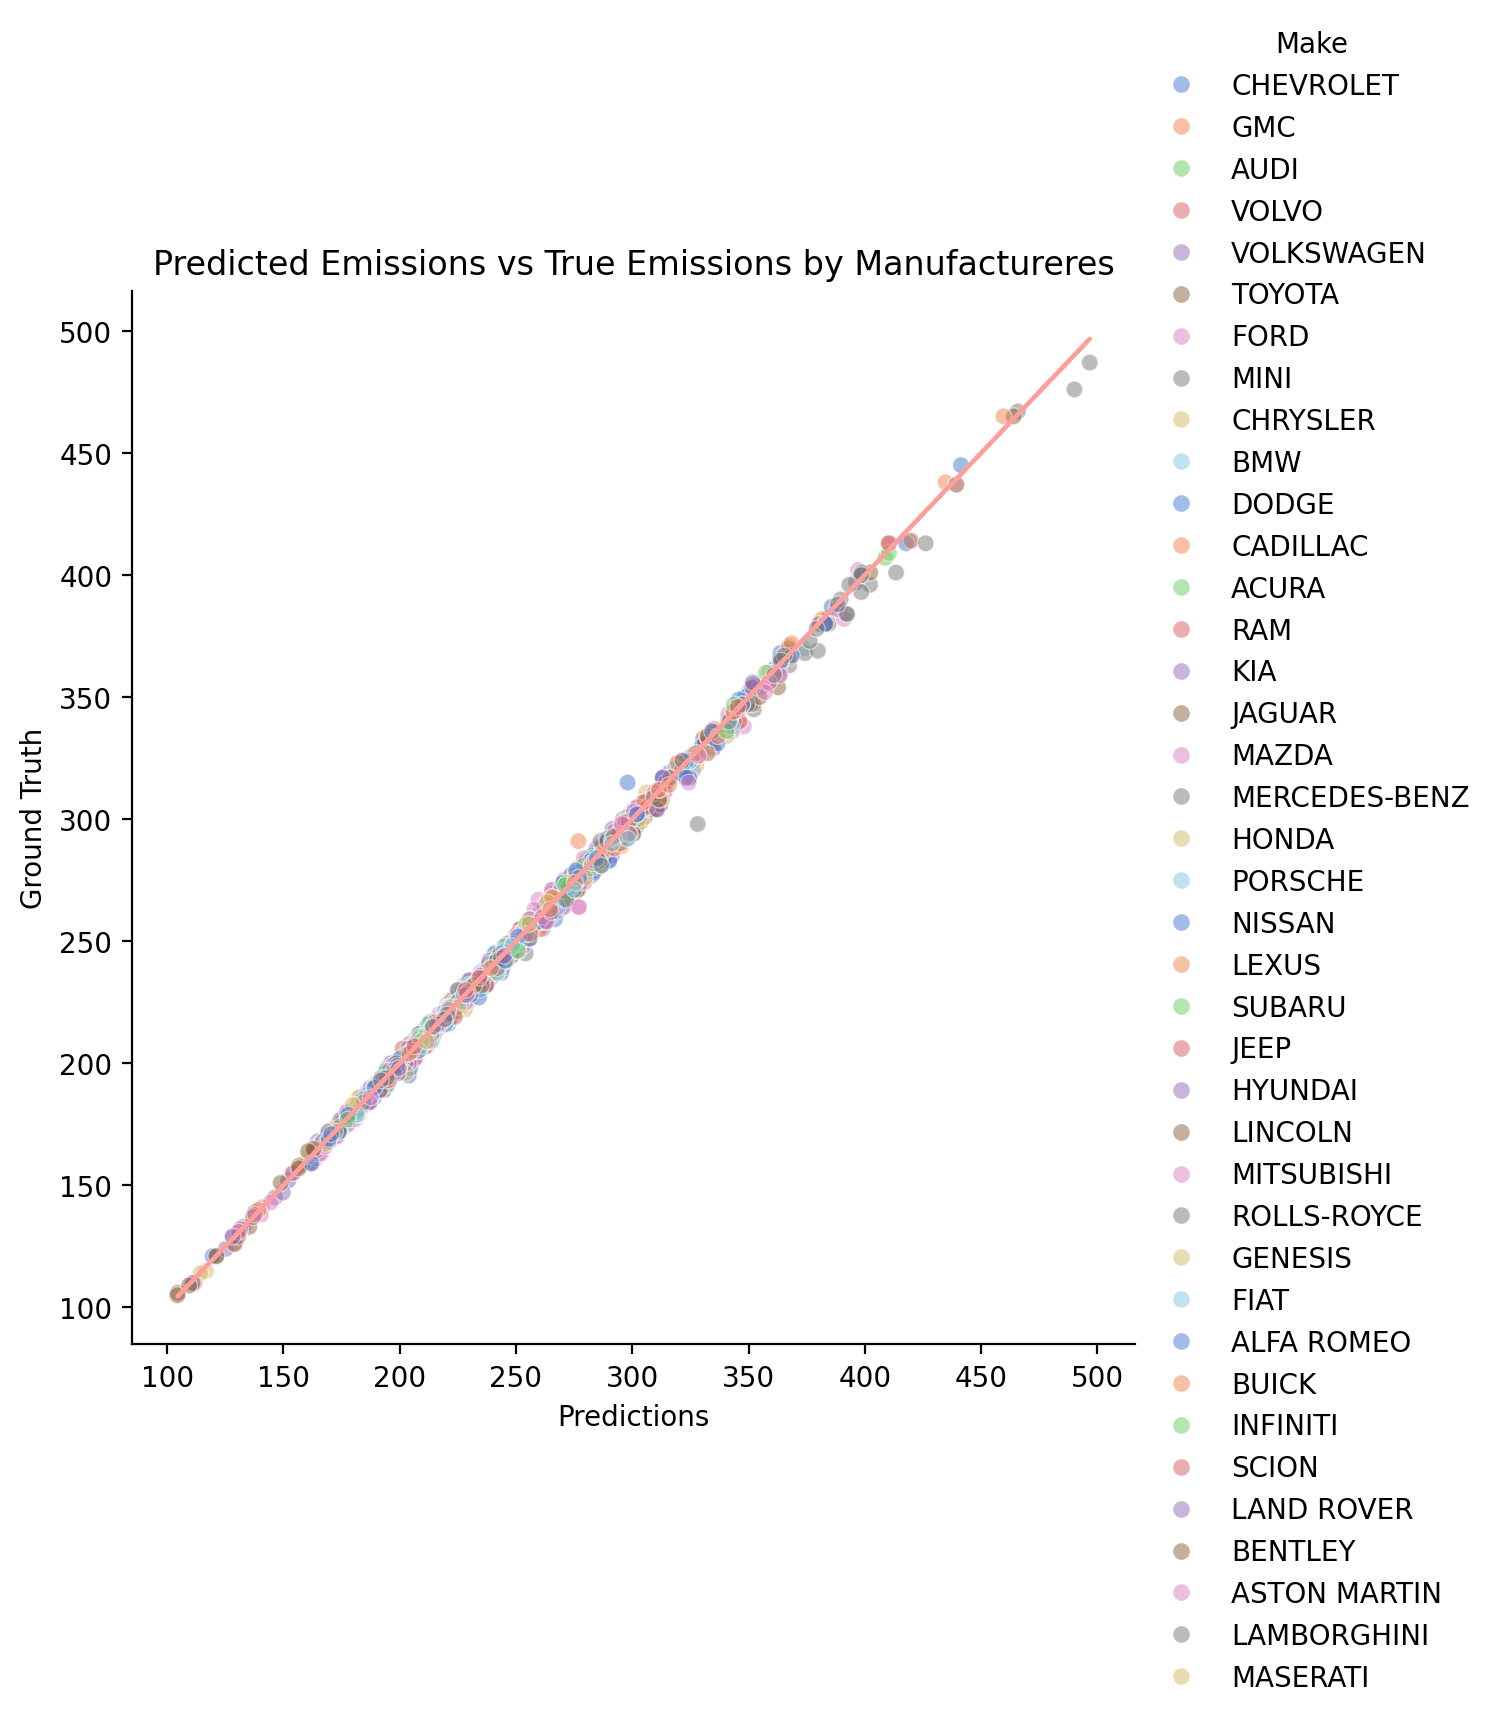

In [12]:
df_line = pd.DataFrame()
df_line["straight_line"] = df["Predictions"]
sns.relplot(x="Predictions", y="Ground Truth", hue="Make", alpha=.5, palette="muted",
            height=6, data=df)
plt.plot(df["Predictions"],df["Predictions"],"r")
plt.title("Predicted Emissions vs True Emissions by Manufactureres")

plt.savefig("Pred_vs_True_Manufacturers.svg")
plt.savefig("Pred_vs_True_Manufacturers.png")
plt.show()